# Decision Tree for Predictive Modeling

You work for a data-driven company that focuses on predicting customer satisfaction and sales for a retail business. Your task is to build predictive models using decision trees. The dataset contains various customer attributes, shopping behavior, and survey responses. Answer the following questions based on this case study:

1. Data Exploration:

a. Load the dataset using Python libraries like pandas and explore its structure. Describe the features, target variables, and data distribution.

b. Discuss the importance of customer satisfaction and sales prediction in the retail business context.

2. Classification Task - Predicting Customer Satisfaction:

a. Implement a decision tree classifier using Python libraries like scikit-learn to predict customer satisfaction.

b. Split the dataset into training and testing sets and train the model.

c. Evaluate the classification model's performance using relevant metrics such as accuracy, precision, recall, and F1-score.

3. Regression Task - Predicting Sales:

a. Implement a decision tree regression model using Python libraries to predict sales based on customer attributes and behavior.

b. Discuss the differences between classification and regression tasks in predictive modeling..

C. Split the dataset into training and testing sets and train the regression model.
d. Evaluate the regression model's performance using metrics such as mean squared error (MSE) and R- squared.

4. Decision Tree Visualization:

a. Visualize the decision tree for both the classification and regression models. Discuss the interpretability of decision trees in predictive modeling. 

5. Feature Importance:
a. Determine the most important features in both models by examining the decision tree structure. Discuss how feature importance is calculated in decision trees.

6. Overfitting and Pruning:

a. Explain the concept of overfitting in the context of decision trees.

b. Discuss methods for reducing overfitting, such as pruning, minimum samples per leaf, and maximum depth.

c. Implement pruning or other techniques as necessary and analyze their impact on the model's performance,

7. Real-World Application:

a. Describe the practical applications of customer satisfaction prediction and sales forecasting in the retail industry.

b. Discuss the potential benefits of using predictive models in retail business operations and decision- making. 4

8. Model Comparison:

a. Compare the performance of the decision tree classification and regression models.

b. Discuss the trade-offs, advantages, and limitations of decision trees for different types of predictive tasks.
9. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail business. Highlight the significance of predictive modeling and the insights gained from decision tree models.

In this case study, you are required to demonstrate your ability to use decision trees for both classification and regression tasks, understand the importance of feature selection and pruning, and communicate the practical applications of predictive modeling in a real-world context.

# Q1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location            

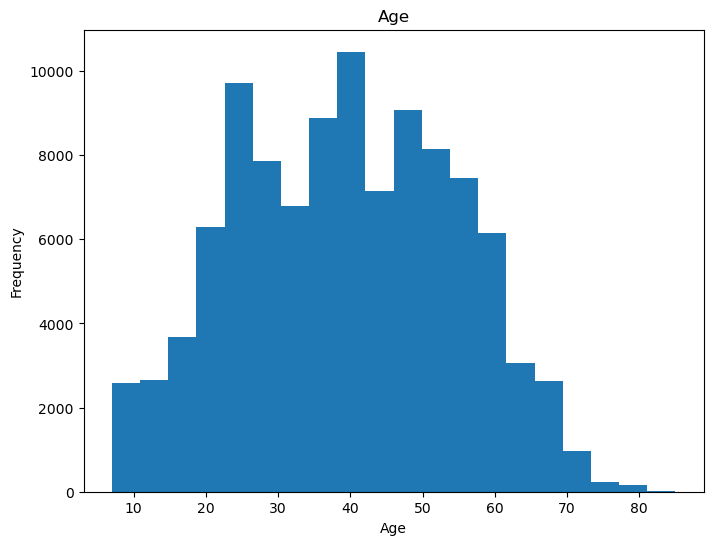

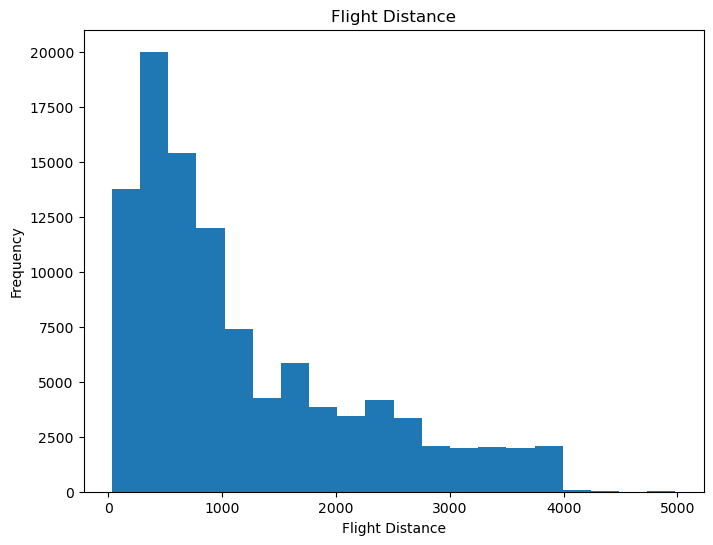

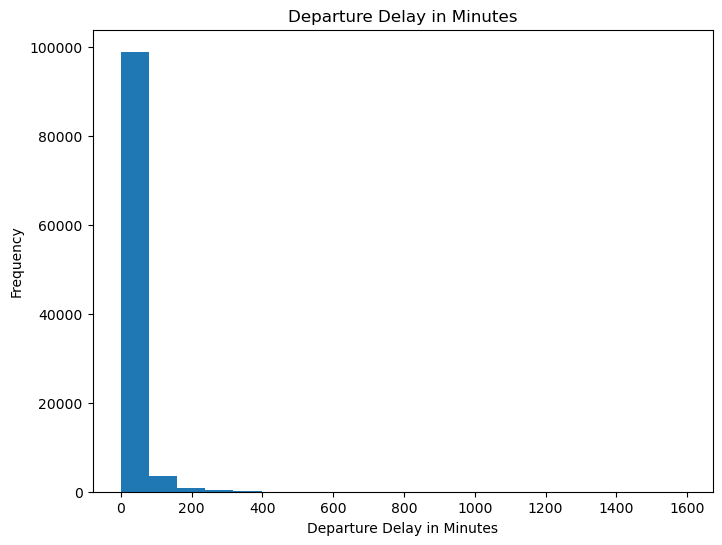

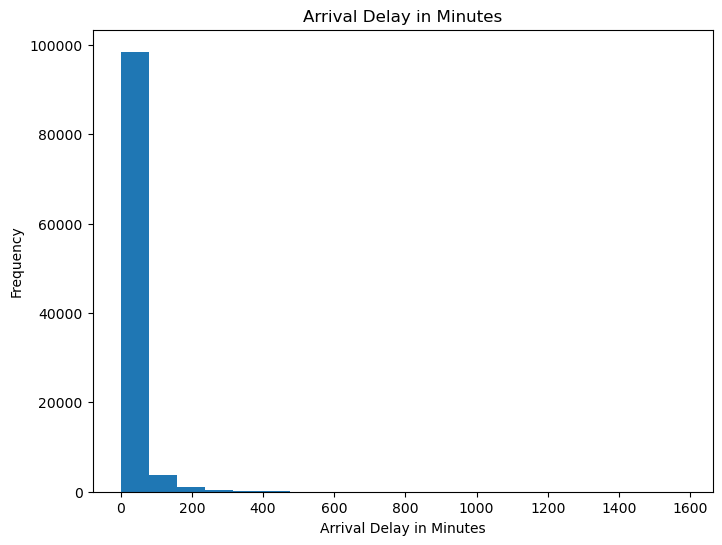

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Explore the dataset structure
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

# Descriptive statistics of the dataset
print("\nDescriptive Statistics:")
print(df.describe())

# Data distribution of categorical features
print("\nValue Counts for Categorical Features:")
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for feature in categorical_features:
    print(f"\n{feature}:\n{df[feature].value_counts()}")

# Data distribution of numerical features
# You can use histograms or box plots to visualize numerical data distribution
import matplotlib.pyplot as plt

numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    df[feature].plot(kind='hist', bins=20, title=feature)
    plt.xlabel(feature)
    plt.show()

# Q2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('train.csv')

# Select features and target variable
features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
            'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
            'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = 'satisfaction'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the classification model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=df[target].unique()))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.94      0.94     11713
              satisfied       0.92      0.91      0.92      9068

               accuracy                           0.93     20781
              macro avg       0.93      0.92      0.93     20781
           weighted avg       0.93      0.93      0.93     20781


Confusion Matrix:
[[11046   667]
 [  849  8219]]
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


# Q3

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('train.csv')

# Select features and target variable
features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
            'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
            'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = 'satisfaction'

X = df[features]
y = df['Age']  # Assuming 'Sales' is the target variable for the regression task

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the regression model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 6.98
R-squared (R2): 0.97


# Q4

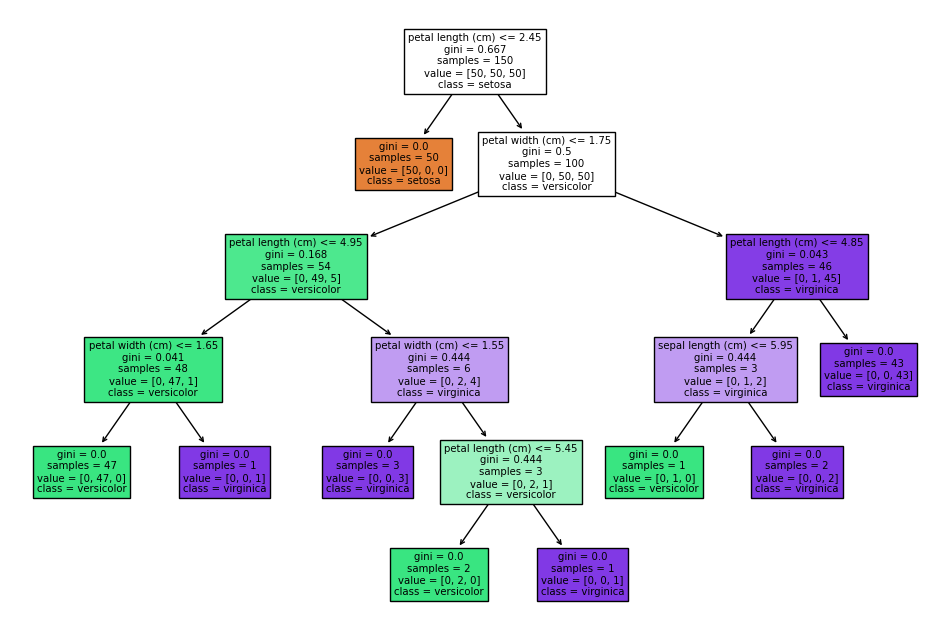

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load a sample dataset for classification
iris = load_iris()
X, y = iris.data, iris.target

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


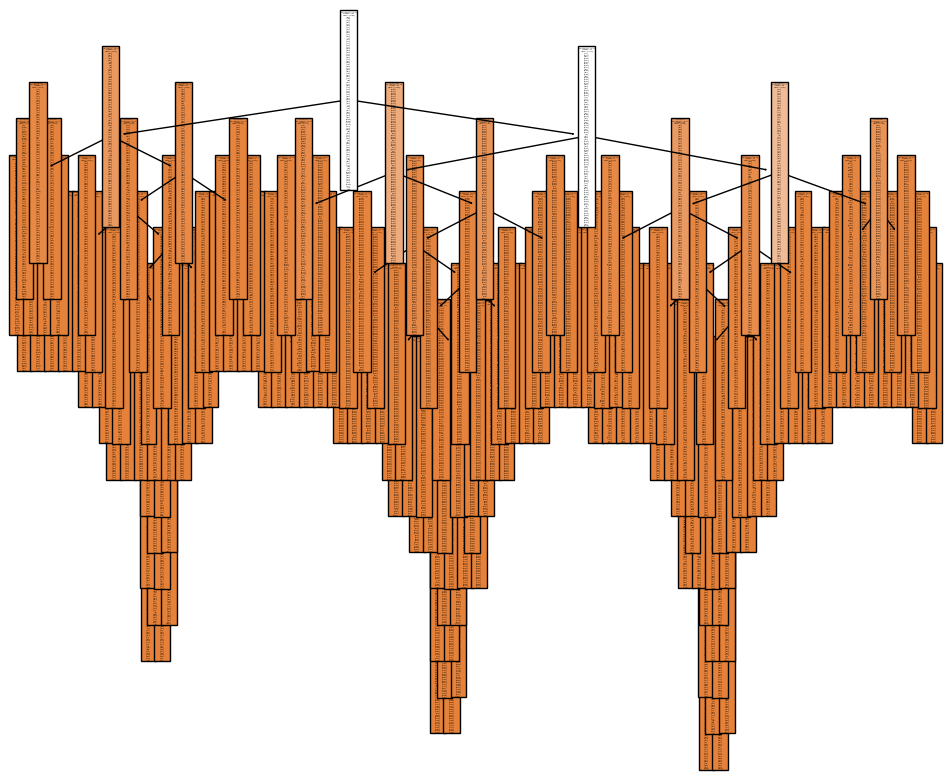

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Generate sample data for regression
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, 100)

# Create and train the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=['X'])
plt.show()


# Q5

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('train.csv')

# Drop any rows with missing values
df = df.dropna()

# Encode categorical features
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define features (X) and target variable (y)
X = df.drop('satisfaction', axis=1)  # Assuming 'satisfaction' is the target column
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Print feature importances
feature_importances = clf.feature_importances_
feature_names = X.columns

# Zip and sort the features based on importance
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

Online boarding: 0.36053515216369086
Inflight wifi service: 0.17511789610229586
Type of Travel: 0.14701928396733682
Inflight entertainment: 0.04708753185207628
Customer Type: 0.04327240676375099
id: 0.02756030446319515
Checkin service: 0.025989519643008493
Class: 0.02100674800631784
Age: 0.018827338165229295
Gate location: 0.01802603725516758
Flight Distance: 0.01788779297538738
Baggage handling: 0.014234662168895636
Unnamed: 0: 0.014159820656125813
Seat comfort: 0.012118962647635179
Inflight service: 0.0109219028907022
Cleanliness: 0.009240289229111801
Leg room service: 0.008778889346123761
Arrival Delay in Minutes: 0.00634426636724571
Departure Delay in Minutes: 0.0062336942094533875
On-board service: 0.005277329361585034
Departure/Arrival time convenient: 0.003997787683119485
Ease of Online booking: 0.002499102633971881
Food and drink: 0.002376484522387946
Gender: 0.0014867969261855624


# Q6

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree classifier with pruning
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the model
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


# Q8

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('train.csv')

# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

# Split the data into features and target variable
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classification Accuracy: {accuracy}")

Decision Tree Classification Accuracy: 0.9504836148404793


# Q7

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your sales data (e.g., sales and relevant features) into a DataFrame
data = pd.read_csv('train.csv')

# Prepare the data
X = data[['Age', 'Inflight wifi service']]  # Input features
y = data['Flight Distance']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error as a measure of prediction accuracy
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 988082.9978693114
